## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Reading the dataset into a DataFrame

In [56]:
df = pd.read_csv('CC GENERAL.csv')

In [58]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [60]:
df = df.fillna(0)

In [62]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [66]:
df= df.set_index('CUST_ID')

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

## K-Means

Find the optimal Kmeans model

In [97]:
n_clusters_range = np.arange(2,9)
ssd=[]
best_n_clusters = None
silhouette_scores = []

for n_clusters in n_clusters_range:
    model = KMeans(n_clusters=n_clusters,random_state=42)
    model.fit(scaled_df)
    ssd.append(model.inertia_)
    labels=model.labels_
    score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(score)

Choose the optimal K and calculate the silhouette score for the best model.

Text(0.5, 0, 'Ks')

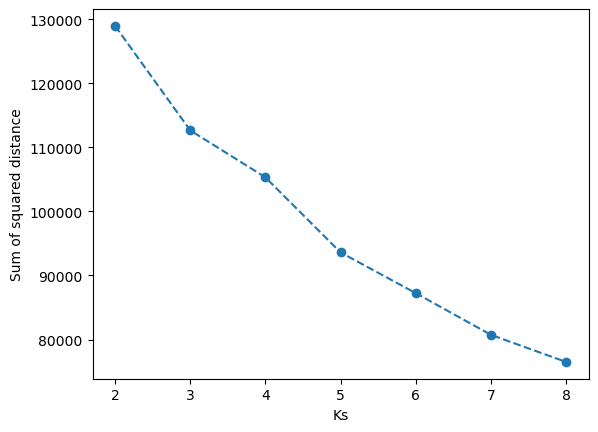

In [103]:
plt.plot(n_clusters_range,ssd,'o--')
plt.ylabel("Sum of squared distance")
plt.xlabel("Ks")

## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [80]:
s=[]
linkage_list=["average","single"]
affinity_list=["euclidean","manhattan","cosine"]
n=np.arange(2,20)
best=-1
best_n=1
for n_clusters in n:
        model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='average')
        model = model.fit(scaled_df)
        silhouette=silhouette_score(scaled_df,model.labels_)
        s.append(silhouette)
        if silhouette >= best:
                best_n=n_clusters
                best =silhouette 
print("Best agglomerative clustering model for this data is number of clusters="+" " + str(best_n)+" " +"with linkage of "
      +str(best_linkage)+" and affinity of "+str(best_affinity)+"." "Silhouette Score is "+str(best)+".")

Best agglomerative clustering model for this data is number of clusters= 2 with linkage of   and affinity of  .Silhouette Score is 0.8496939039704499.


Choose the optimal K and calculate the silhouette score for the best model.

Text(0, 0.5, 'Silhouette Score')

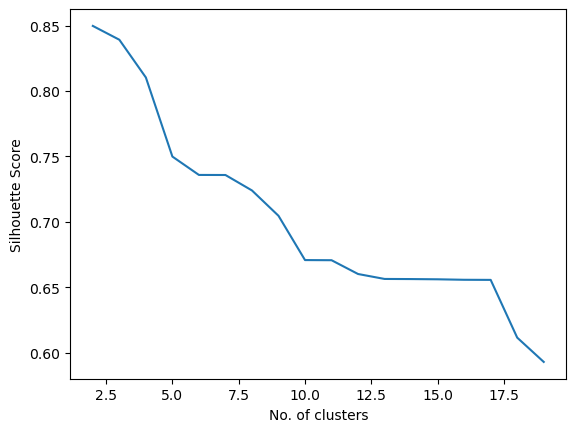

In [109]:
plt.plot(range(2,20), s)
plt.xlabel("No. of clusters")
plt.ylabel("Silhouette Score")

In [111]:
s=[]
linkage_list=["average","single"]
affinity_list=["euclidean","manhattan","cosine"]
n=np.arange(2,20)
best=-1
best_n=1
for n_clusters in n:
        model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='single')
        model = model.fit(scaled_df)
        silhouette=silhouette_score(scaled_df,model.labels_)
        s.append(silhouette)
        if silhouette >= best:
                best_n=n_clusters
                best =silhouette 
print("Best agglomerative clustering model for this data is number of clusters="+" " + str(best_n)+" " +"with linkage of "
      +str(best_linkage)+" and affinity of "+str(best_affinity)+"." "Silhouette Score is "+str(best)+".")

Best agglomerative clustering model for this data is number of clusters= 2 with linkage of   and affinity of  .Silhouette Score is 0.8408109014271563.


Text(0, 0.5, 'Silhouette Score')

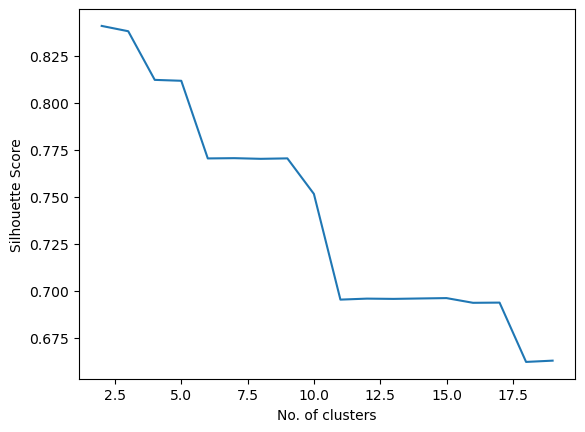

In [112]:
plt.plot(range(2,20), s)
plt.xlabel("No. of clusters")
plt.ylabel("Silhouette Score")

## DBSCAN

Find the optimal DBSCAN model.

In [115]:
outlier_percent = []

eps_values = np.linspace(0.1, 5, 50)

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)  
    cluster_labels = dbscan.fit_predict(scaled_df)
    
    # Calculate percentage of outliers
    perc_outliers = 100 * np.sum(cluster_labels == -1) / len(cluster_labels)
    outlier_percent.append(perc_outliers)

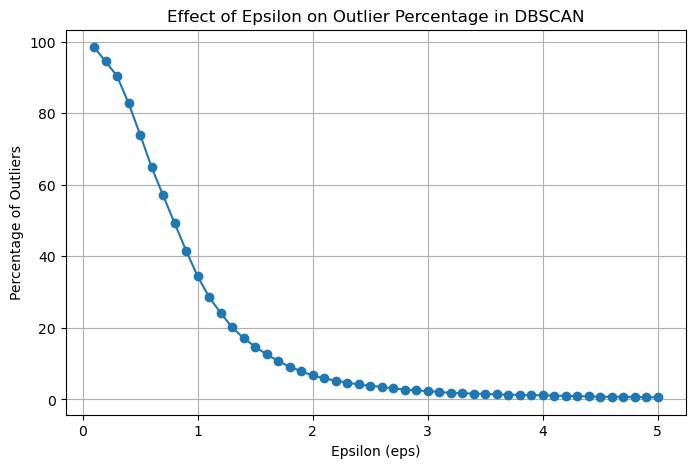

In [116]:
plt.figure(figsize=(8, 5))
plt.plot(eps_values, outlier_percent, marker='o', linestyle='-')
plt.xlabel("Epsilon (eps)")
plt.ylabel("Percentage of Outliers")
plt.title("Effect of Epsilon on Outlier Percentage in DBSCAN")
plt.grid()
plt.show()

Find the parameters that optimize the performance of your model and calculate the silhouette score.

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?